# Human as a model

This is another way of baseline comparison where the psychologist is shown the same data as the model: post (travel) and two types of narcissism scores - the training dataset in total of 91 examples as the one below.

| post_travel         | adm     | riv |
|--------------|-----------|------------|
| I wish I could travel 24/7 and get paid for it | 1.444 | 1.111 |

And then has to assess the admiration and rivalry scores in the test dataset (44 examples) based on the posts. As shown below. 

| post_travel         | adm     | riv |
|--------------|-----------|------------|
| Roads were quiet on the way to London today. |  | |

Then the comparison between the true and predicted results is conducted. 

The final results show that human psychologists perform worse than Few-shot method.

## Load the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

import torch
from torch.nn import HuberLoss

In [2]:
path_to_human_assessed_A = '../data/responses/human_as_model_travel_A.csv'
path_to_human_assessed_B = '../data/responses/human_as_model_travel_B.csv'
path_to_human_assessed_C = '../data/responses/human_as_model_travel_C.csv'

path_to_test = '../data/split/test.csv'

In [3]:
# load the human assessed data
human_data_A = pd.read_csv(path_to_human_assessed_A)
human_data_B = pd.read_csv(path_to_human_assessed_B)
human_data_C = pd.read_csv(path_to_human_assessed_C)
human_data_A.head()

,post_travel,adm,riv
0,Had an amazing time visiting London - the show...,2.3,1.6
1,Had a fab holiday to Mauritius! So exotic and ...,3.4,2.4
2,Roads were quiet on the way to London today.,3.8,3.0
3,Amazing holiday exploring Canada and a flying ...,2.5,2.0
4,I love being a traveller rather than a tourist...,3.5,3.0


In [4]:
# load the test data
test_data = pd.read_csv(path_to_test)
test_data[['post_travel','adm','riv']].head()

,post_travel,adm,riv
0,Had an amazing time visiting London - the show...,1.667,1.333
1,Had a fab holiday to Mauritius! So exotic and ...,3.000,2.000
2,Roads were quiet on the way to London today.,3.111,1.556
3,Amazing holiday exploring Canada and a flying ...,2.222,4.000
4,I love being a traveller rather than a tourist...,2.889,1.222


In [5]:
# drop not needed columns
test_data = test_data[['post_travel','adm','riv']]

In [6]:
# Merge the two dataframes
merged_data = test_data.merge(human_data_A, on='post_travel', suffixes=('', '_human_A')) \
                  .merge(human_data_B, on='post_travel', suffixes=('', '_human_B')) \
                  .merge(human_data_C, on='post_travel', suffixes=('', '_human_C'))
merged_data.rename(columns={'adm': 'adm_original', 'riv': 'riv_original'}, inplace=True)
# Check the length of the merged data
print(f"Merged correctly: {len(merged_data)==len(human_data_A)==len(human_data_B)==len(human_data_C)==len(test_data)}")
merged_data.head()

Merged correctly: True


,post_travel,adm_original,riv_original,adm_human_A,riv_human_A,adm_human_B,riv_human_B,adm_human_C,riv_human_C
0,Had an amazing time visiting London - the show...,1.667,1.333,2.3,1.6,3.5,2.5,3.0,1.5
1,Had a fab holiday to Mauritius! So exotic and ...,3.000,2.000,3.4,2.4,3.0,1.0,5.0,2.5
2,Roads were quiet on the way to London today.,3.111,1.556,3.8,3.0,1.0,2.0,2.0,2.0
3,Amazing holiday exploring Canada and a flying ...,2.222,4.000,2.5,2.0,3.0,3.0,2.5,1.2
4,I love being a traveller rather than a tourist...,2.889,1.222,3.5,3.0,4.0,4.0,5.0,3.0


# Mean squared error for the human assessed data

In [19]:
# Calculate the mean squared error
rmse_adm_A = root_mean_squared_error(merged_data['adm_human_A'], merged_data['adm_original'])
rmse_riv_A = root_mean_squared_error(merged_data['riv_human_A'], merged_data['riv_original'])
rmse_adm_B = root_mean_squared_error(merged_data['adm_human_B'], merged_data['adm_original'])
rmse_riv_B = root_mean_squared_error(merged_data['riv_human_B'], merged_data['riv_original'])
rmse_adm_C = root_mean_squared_error(merged_data['adm_human_C'], merged_data['adm_original'])
rmse_riv_C = root_mean_squared_error(merged_data['riv_human_C'], merged_data['riv_original'])
print(f"Root mean Squared Error for adm: A:{rmse_adm_A}, B:{rmse_adm_B}, C:{rmse_adm_C},\n\
       mean: {np.mean([rmse_adm_A,rmse_adm_B,rmse_adm_C])}")
print(f"Root mean Squared Error for riv: A:{rmse_riv_A}, B:{rmse_riv_B}, C:{rmse_riv_C},\n\
       mean: {np.mean([rmse_riv_A,rmse_riv_B,rmse_riv_C])}")

Root mean Squared Error for adm: A:0.9398448614725537, B:1.105899140559802, C:1.2925764264374537,
       mean: 1.112773476156603
Root mean Squared Error for riv: A:1.224856123276229, B:1.2662596225964808, C:1.2475611753992812,
       mean: 1.246225640423997


# Other metrics

In [17]:
# other metrics
# Calculate the mean absolute error
mae_adm_A = mean_absolute_error(merged_data['adm_human_A'], merged_data['adm_original'])
mae_riv_A = mean_absolute_error(merged_data['riv_human_A'], merged_data['riv_original'])
mae_adm_B = mean_absolute_error(merged_data['adm_human_B'], merged_data['adm_original'])
mae_riv_B = mean_absolute_error(merged_data['riv_human_B'], merged_data['riv_original'])
mae_adm_C = mean_absolute_error(merged_data['adm_human_C'], merged_data['adm_original'])
mae_riv_C = mean_absolute_error(merged_data['riv_human_C'], merged_data['riv_original'])

print(f"Mean Absolute Error for adm: A:{mae_adm_A}, B:{mae_adm_B}, C:{mae_adm_C},\n\
       mean: {np.mean([mae_adm_A,mae_adm_B,mae_adm_C])}")
print(f"Mean Absolute Error for riv: A:{mae_riv_A}, B:{mae_riv_B}, C:{mae_riv_C},\n\
       mean: {np.mean([mae_riv_A,mae_riv_B,mae_riv_C])}")

Mean Absolute Error for adm: A:0.7596363636363637, B:0.837090909090909, C:1.0454545454545452,
       mean: 0.8807272727272727
Mean Absolute Error for riv: A:1.0123863636363637, B:1.0292954545454547, C:0.9444318181818182,
       mean: 0.9953712121212122


In [18]:
# other metrics
# Calculate huber loss
huber_loss = HuberLoss()
huber_adm_A = huber_loss(torch.tensor(merged_data['adm_human_A']), torch.tensor(merged_data['adm_original']))
huber_adm_B = huber_loss(torch.tensor(merged_data['adm_human_B']), torch.tensor(merged_data['adm_original']))
huber_adm_C = huber_loss(torch.tensor(merged_data['adm_human_C']), torch.tensor(merged_data['adm_original']))
huber_riv_A = huber_loss(torch.tensor(merged_data['riv_human_A']), torch.tensor(merged_data['riv_original']))
huber_riv_B = huber_loss(torch.tensor(merged_data['riv_human_B']), torch.tensor(merged_data['riv_original']))
huber_riv_C = huber_loss(torch.tensor(merged_data['riv_human_C']), torch.tensor(merged_data['riv_original']))

print(f"Huber Loss for adm: A:{huber_adm_A}, B:{huber_adm_B}, C:{huber_adm_C}, \n\
       mean: {np.mean([huber_adm_A,huber_adm_B,huber_adm_C])}")
print(f"Huber Loss for riv: A:{huber_riv_A}, B:{huber_riv_B}, C:{huber_riv_C}, \n\
       mean: {np.mean([huber_riv_A,huber_riv_B,huber_riv_C])}")


Huber Loss for adm: A:0.3945392727272727, B:0.4948598409090908, C:0.6358154772727271, 
       mean: 0.5084048636363635
Huber Loss for riv: A:0.596712534090909, B:0.6279087499999999, C:0.5920995795454546, 
       mean: 0.6055736212121211


In [10]:
def quantile_loss(y_true: torch.Tensor, y_pred: torch.Tensor, quantile=0.5):
    error = y_true - y_pred
    return torch.mean(torch.max(quantile * error, (quantile - 1) * error))

In [20]:
quan_adm_A = quantile_loss(torch.tensor(merged_data['adm_human_A']), torch.tensor(merged_data['adm_original']))
quan_adm_B = quantile_loss(torch.tensor(merged_data['adm_human_B']), torch.tensor(merged_data['adm_original']))
quan_adm_C = quantile_loss(torch.tensor(merged_data['adm_human_C']), torch.tensor(merged_data['adm_original']))
quan_riv_A = quantile_loss(torch.tensor(merged_data['riv_human_A']), torch.tensor(merged_data['riv_original']))
quan_riv_B = quantile_loss(torch.tensor(merged_data['riv_human_B']), torch.tensor(merged_data['riv_original']))
quan_riv_C = quantile_loss(torch.tensor(merged_data['riv_human_C']), torch.tensor(merged_data['riv_original']))

print(f"Quantile Loss for adm: A:{quan_adm_A}, B:{quan_adm_B}, C:{quan_adm_C}, \n\
       mean: {np.mean([quan_adm_A,quan_adm_B,quan_adm_C])}")
print(f"Quantile Loss for riv: A:{quan_riv_A}, B:{quan_riv_B}, C:{quan_riv_C}, \n\
       mean: {np.mean([quan_riv_A,quan_riv_B,quan_riv_C])}")

Quantile Loss for adm: A:0.37981818181818183, B:0.4185454545454545, C:0.5227272727272727, 
       mean: 0.44036363636363635
Quantile Loss for riv: A:0.5061931818181817, B:0.5146477272727273, C:0.4722159090909091, 
       mean: 0.497685606060606


In [12]:
def maxae(y_true: np.ndarray, y_pred: np.ndarray):
    return np.max(np.abs(y_true - y_pred))

In [23]:
maxae_adm_A = maxae(merged_data['adm_human_A'], merged_data['adm_original'])
maxae_adm_B = maxae(merged_data['adm_human_B'], merged_data['adm_original'])
maxae_adm_C = maxae(merged_data['adm_human_C'], merged_data['adm_original'])
maxae_riv_A = maxae(merged_data['riv_human_A'], merged_data['riv_original'])
maxae_riv_B = maxae(merged_data['riv_human_B'], merged_data['riv_original'])
maxae_riv_C = maxae(merged_data['riv_human_C'], merged_data['riv_original'])

print(f"Max Absolute Error for adm: A:{maxae_adm_A}, B:{maxae_adm_B}, C:{maxae_adm_C},\n\
       mean: {np.mean([maxae_adm_A,maxae_adm_B,maxae_adm_C])}")
print(f"Max Absolute Error for riv: A:{maxae_riv_A}, B:{maxae_riv_B}, C:{maxae_riv_C},\n\
       mean: {np.mean([maxae_riv_A,maxae_riv_B,maxae_riv_C])}")

Max Absolute Error for adm: A:2.022, B:2.556, C:2.889,
       mean: 2.4889999999999994
Max Absolute Error for riv: A:2.567, B:2.778, C:2.8,
       mean: 2.715


### Distribution

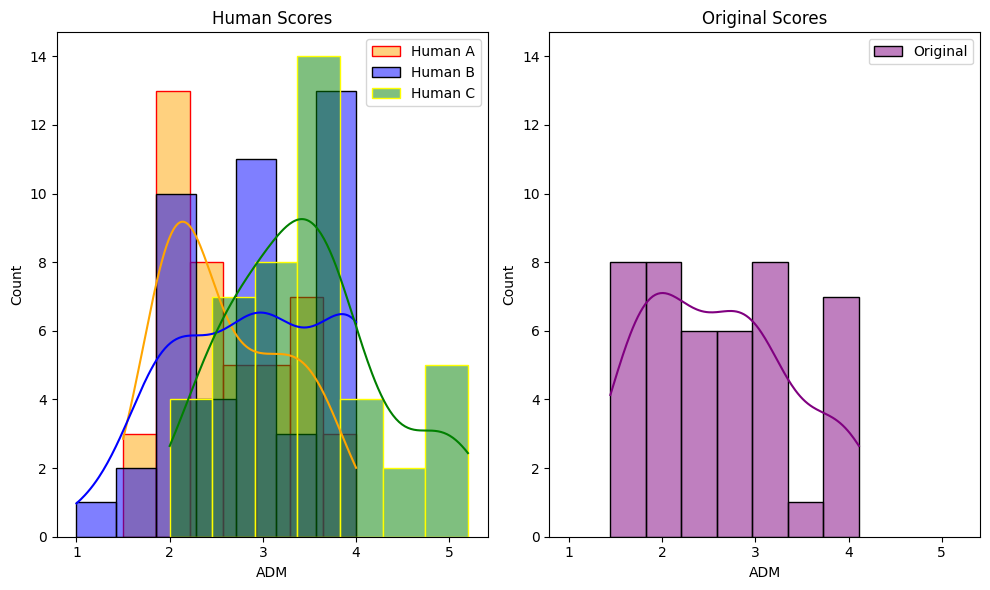

In [29]:
# Define variables for plotting
colors = ['orange', 'blue', 'green']
edgecolors = ['red', 'black', 'yellow']
labels = ['Human A', 'Human B', 'Human C']

# Plotting the histograms
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(1, 2, 1)
for i, suffix in enumerate(['_human_A', '_human_B', '_human_C']):
    sns.histplot(merged_data[f'adm{suffix}'], color=colors[i], edgecolor=edgecolors[i], kde=True, label=labels[i])
plt.title('Human Scores')
plt.xlabel('ADM')
plt.legend()

# Plot for original data
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
sns.histplot(merged_data['adm_original'], kde=True, color='purple', label='Original')
plt.title('Original Scores')
plt.xlabel('ADM')
plt.legend()

plt.tight_layout()
plt.show()

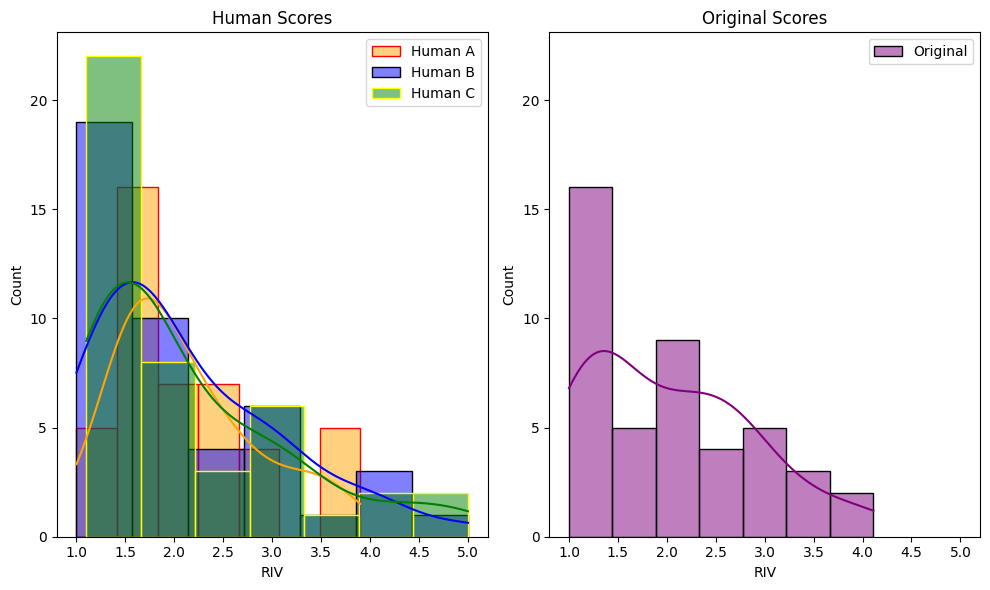

In [28]:
# Define variables for plotting
colors = ['orange', 'blue', 'green']
edgecolors = ['red', 'black', 'yellow']
labels = ['Human A', 'Human B', 'Human C']

# Plotting the histograms
plt.figure(figsize=(10, 6))

ax1 = plt.subplot(1, 2, 1)
for i, suffix in enumerate(['_human_A', '_human_B', '_human_C']):
    sns.histplot(merged_data[f'riv{suffix}'], color=colors[i], edgecolor=edgecolors[i], kde=True, label=labels[i])
plt.title('Human Scores')
plt.xlabel('RIV')
plt.legend()

# Plot for original data
ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
sns.histplot(merged_data['riv_original'], kde=True, color='purple', label='Original')
plt.title('Original Scores')
plt.xlabel('RIV')
plt.legend()

plt.tight_layout()
plt.show()

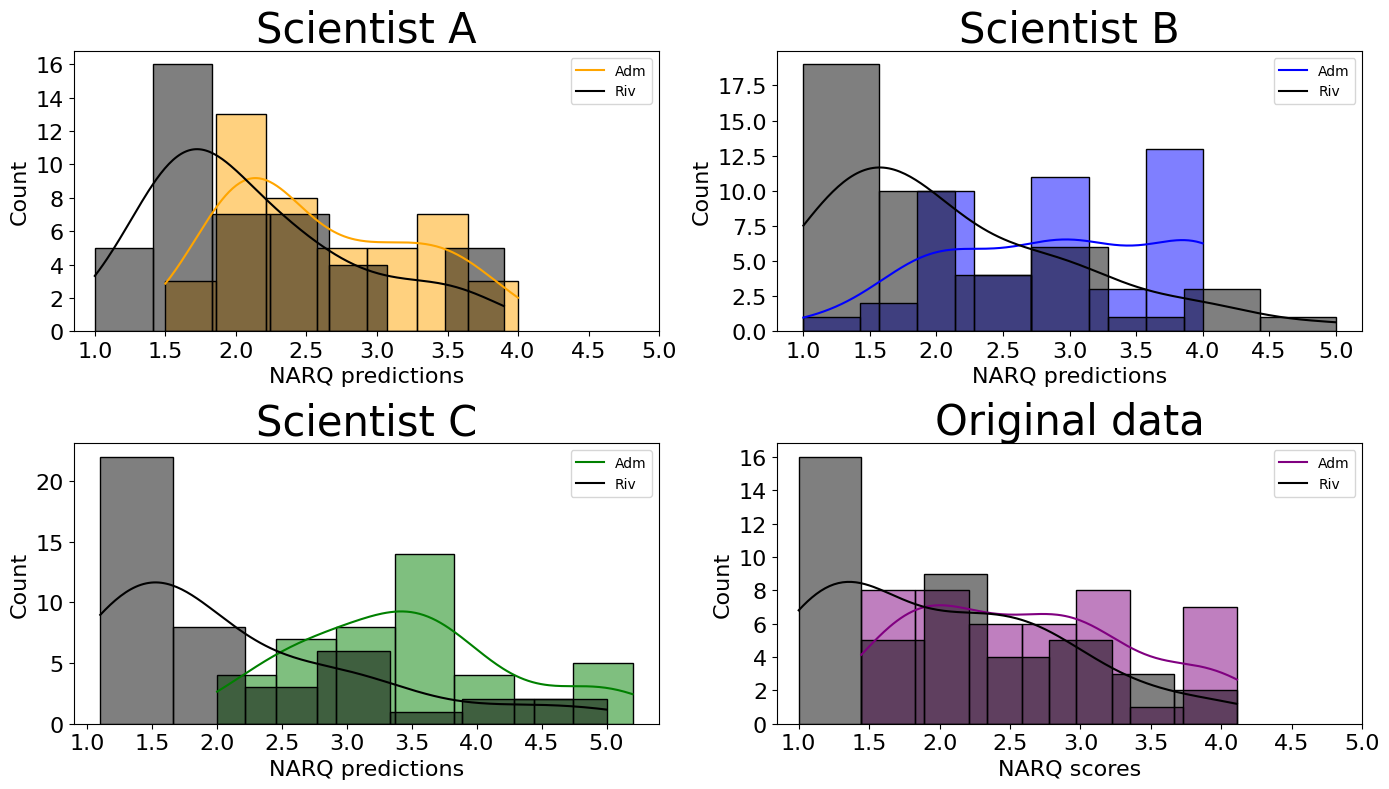

In [32]:
# Plotting histograms grouped together
plt.figure(figsize=(14, 8))

colors = ['orange', 'blue', 'green', 'purple']
labels = ['Scientist A', 'Scientist B', 'Scientist C', 'Original data']
columns = ['adm_human_A', 'adm_human_B', 'adm_human_C', 'adm_original']
columns_r = ['riv_human_A', 'riv_human_B', 'riv_human_C', 'riv_original']
xlabels = ['NARQ predictions','NARQ predictions','NARQ predictions','NARQ scores']
for i, column in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(merged_data[column], color=colors[i], kde=True)
    sns.histplot(merged_data[columns_r[i]], color='black', kde=True)

    plt.title(labels[i],fontsize=30)
    plt.xlabel(xlabels[i], fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(np.arange(1.0, 5.5, 0.5),fontsize=16)
    plt.legend(["Adm","Riv"])



plt.tight_layout()
plt.show()